# Warm Up
Convert the movies excel file to a netcdf file
#1 import as pandas data frame
#2 convert dataframe to xarray dataset (google it)
#3 write data set as netcdf file (google it)
#4 load in your .nc file and check it

In [36]:
# first i'm going to import the modules we will need
import pandas as pd
import xlrd 
import xlwt
import xlsxwriter
import netCDF4 as nc
import xarray as xr


# #1 
### import as pandas data frame

In [37]:
# this is the file as a pandas DataFrame
file = "/Users/abigailpozulp/Downloads/movies.xls"
movies = pd.read_excel(file)

In [38]:
type(movies)

pandas.core.frame.DataFrame

# #2
### convert dataframe to xarray dataset
#http://xarray.pydata.org/en/stable/pandas.html


In [16]:
# this will convert dataframe to xarray
movies2 = xr.Dataset.from_dataframe(movies)

In [15]:
type(movies2)

xarray.core.dataset.Dataset

# #3
### write dataset as netcdf file
#http://xarray.pydata.org/en/stable/generated/xarray.DataArray.to_netcdf.html
#https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Saving_Datasets_and_DataArrays_to_NetCDF.html

In [39]:
#write to netcdf file
movies2.to_netcdf("movies2.nc")

# #4 
### load .nc file to check

In [75]:
movies_loaded = xr.open_dataset("movies2.nc")

In [76]:
type(movies_loaded)

xarray.core.dataset.Dataset

# Lec 9.1 Model fitting 1
### corelation and linear regression

# 9.1.1 Correlation
When we get data, we want to describe how variables relate to each other. The simplest question we can ask are two variables correlated?

#The metric we use for correlation is the Pearson correlation coefficient, which is hard to grasp intuitively from looking at the equation (see https://en.wikipedia.org/wiki/Correlation_and_dependence). Basically, correlation is a measure of how linearly correlated two variables are, and has values between 1 and -1. If the two variables fall on a straight line and the both increase together, then the correlation is 1. If one increases while the other decreases, the correlation is -1. Correlations near zero mean the two variables are not correlated.

#Let's use the movie data we worked with previously to test if budgets and gross earnings are correlated

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [28]:
file = "/Users/abigailpozulp/Downloads/movies.xls"
movies = pd.read_excel(file)
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

(0, 1000000000.0)

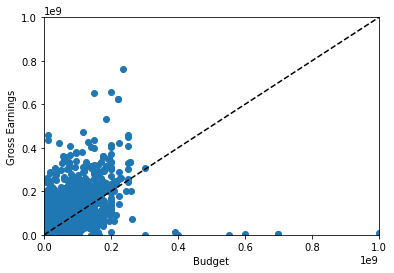

In [29]:
# plot Budget vs Gross Earnings
plt.scatter(movies['Budget'], movies['Gross Earnings'])
plt.plot([0,1E10],[0,1E10], 'k--')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.1E10])
plt.ylim([0,1E9])

#In the above I have added the y=x line to visualize if the gross earnings were above the budget. Because many of the data points are on top of each other, it is difficult to assess visually the relationship between the two variables

#Note that pandas allows us to get the correlation of the entire dataframe all at once. There are many other packages that will do this as well, including numpy.

In [30]:
# pandas allows you to correlate an entire dataframe all at once
movies.corr()
# Budget and Gross earnings are not very correlated, r = 0.10
# the diagonal of the correlation of 1 means you are comparing something with itself

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.030886,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,0.061504,0.007397,-0.003147,0.275707,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.250298,0.173296,0.088449,0.131673,0.123558,0.123074,0.196605,0.013469,0.314765,0.328403,0.258486,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,0.069346,0.001642,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,0.013713,-0.014761,-0.024719,-0.049786,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.102179,0.021090,0.022639,0.044236,0.047451,0.036557,0.062039,-0.019559,0.079621,0.084292,0.119994,0.030688
Gross Earnings,0.030886,0.250298,0.069346,0.102179,1.000000,0.144945,0.154468,0.262768,0.308026,0.247400,0.378082,-0.027755,0.637271,0.559958,0.480601,0.198021
Facebook Likes - Director,-0.063820,0.173296,0.001642,0.021090,0.144945,1.000000,0.090707,0.119587,0.120199,0.119532,0.162036,-0.041297,0.297045,0.221890,0.180674,0.170834
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,0.154468,0.090707,1.000000,0.390466,0.249927,0.951660,0.135320,0.072204,0.192763,0.145461,0.190016,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.262768,0.119587,0.390466,1.000000,0.559662,0.628389,0.243464,0.071177,0.270755,0.219496,0.282306,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.308026,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.099368,0.287239,0.230189,0.271646,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.247400,0.119532,0.951660,0.628389,0.473920,1.000000,0.209754,0.091410,0.265865,0.206923,0.263203,0.085854


# E1. What does it mean that year and duration are negatively correlated? Plot these two variables togther and explain.

# E1 answer
negatively correlated means that as one increases, the other decreases...thier relationship is opposite. As you can see from the plot, the correlation is not very strong, only -0.1, and it does look slightly that as the year increases, the duration decreases.

Text(0, 0.5, 'Duration')

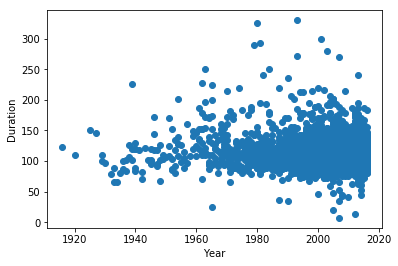

In [32]:
plt.scatter(movies['Year'], movies['Duration'])
plt.xlabel('Year')
plt.ylabel('Duration')


# E2. Which pairs of variables have the highest correlation? What might explain this?

# 9.1.2 Linear regression
See https://en.wikipedia.org/wiki/Linear_regression and http://onlinestatbook.com/2/regression/regression.html for a nice introduction. See https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2 for a good intro on the math

#Supposed we were convinced that gross earnings were linearly related to budget, i.e. G = a*B +c. To test this, we would fit the scatterplot we made above to a line, which would solve for the coefficients a (slope) and c (intercept) in our linear equation.

#The basic idea of linear regression is that one finds the distance of each data point to a line and minimize this (using calculus) to find the best fit line. This is commonly called ordinary least squares, as the distance of the data from the linear model is squared.

#Because the movies database has a number of nans in it, it's a bit difficult to work with. Instead, let's do the tutorial here on linear regression using Boston housing data: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

#This tutorial uses the package scikit-learn

#### notes on linear regression
if you are trying to find out the relationship between earnings and budget, you would try to make a linear equation (y = mx + b) or (earnings = m*budget + b)

#finding m and b is "machine learning"
#calculate residuals of m and b, residuals are the difference between the model and the data
#usually we square the residuals because this gets rid of the negative values 


In [43]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library

What we want to do here is to determine which variables contribute to housing prices

In [47]:
data?
#this data is a "bunch" container object, it coems with a discription

In [48]:
# information on the data:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
# we are going to make two sets, a data fram (df) and a target

In [49]:
# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [53]:
# are room numbers and value correlated?
# numpy can ask the correlation coefficient of two things
np.corrcoef(df["RM"], target["MEDV"])

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

Text(0, 0.5, 'House value ($1000s)')

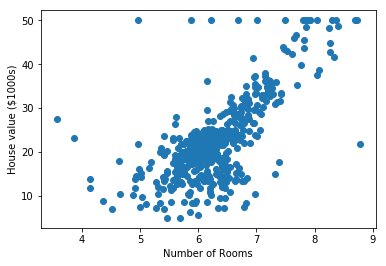

In [51]:
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

## Doing a linear regression using scipy

In [55]:
from scipy import stats

In [56]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RM"],target["MEDV"])


#this gives us the slope and intercept of the line, the corrlation (r_value)
#A low p-value (< 0.05) indicates that the linear regression is a good model
#the standard error is the standard deviation of the data from the model (instead of the mean)

In [57]:
slope

9.102108981180306

In [58]:
intercept

-34.67062077643854

In [59]:
r_value
#note this is the same correlation value

0.695359947071539

In [60]:
p_value

2.487228871008377e-74

In [61]:
std_err

0.41902656012134054

Text(0, 0.5, 'House value ($1000s)')

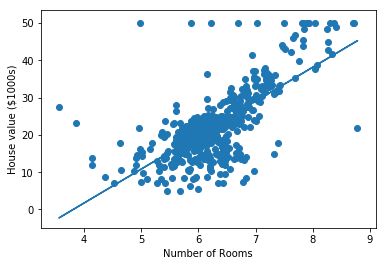

In [63]:
#your y = mx + b
#plug in the df, slope, and intercept that you found above


plt.plot(df["RM"], slope*df["RM"]+intercept)
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

# Doing a linear regression using statsmodels
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

https://www.statsmodels.org/dev/index.html
#stats models allows you to do multiple linear regression easily. 

In [64]:
import statsmodels.api as sm

In [65]:
#renaming the variables for simplification
X = df["RM"] # what we think the cost depends on
y = target["MEDV"]

In [66]:
#define the model first
# Note y, the target, goes first:
model = sm.OLS(y, X).fit()

# this is fitting y = aX, with no constant, or rather an intercept of zero

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          3.74e-256
Time:                        15:27:25   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
predictions = model.predict(X) # make the predictions by the model

In [72]:
predictions

0      24.020779
1      23.458163
2      26.249323
3      25.566146
4      26.110495
5      23.491043
6      21.963943
7      22.548479
8      20.572016
9      21.934716
10     23.297416
11     21.952983
12     21.514581
13     21.733782
14     22.270824
15     21.313646
16     21.682635
17     21.883569
18     19.932680
19     20.922738
20     20.349162
21     21.792235
22     22.438878
23     21.236926
24     21.642448
25     20.455109
26     21.236926
27     22.091810
28     23.728511
29     24.382461
         ...    
476    23.688324
477    19.377371
478    22.595972
479    22.756720
480    22.804213
481    24.660115
482    25.796307
483    21.050605
484    21.448820
485    23.059948
486    22.336584
487    21.573034
488    19.925373
489    19.779239
490    18.606514
491    21.857995
492    21.857995
493    20.849671
494    21.649754
495    20.714497
496    19.691559
497    21.167512
498    21.989516
499    20.345508
500    22.018743
501    24.086539
502    22.358504
503    25.4857

Text(0, 0.5, 'House value ($1000s)')

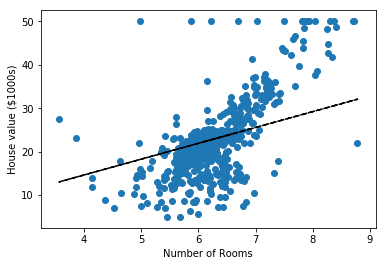

In [69]:
plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')
# this is not a very good fit

In [70]:
#Note that with statsmodels you can easily do generalized linear regression, i.e. regression with more than one variable:
#y = aX_1 + bX_2 + ...

# E3. do the tutorial:
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [78]:
#First, we will import the required libraries.
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline


In [79]:
#Next, we will load the housing data from the scikit-learn library and understand it.
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [83]:
#We print the value of the boston_dataset to understand what it contains. print(boston_dataset.keys()) gives
print(boston_dataset.keys())

#data: contains the information for various houses
#target: prices of the house
#feature_names: names of the features
#DESCR: describes the dataset

#To know more about the features use boston_dataset.DESCR


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [84]:
#We will now load the data into a pandas dataframe using pd.DataFrame. We then print the first 5 rows of the data using head()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [85]:
#We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.
boston['MEDV'] = boston_dataset.target


### Exploratory Data Analysis
Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

#the correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


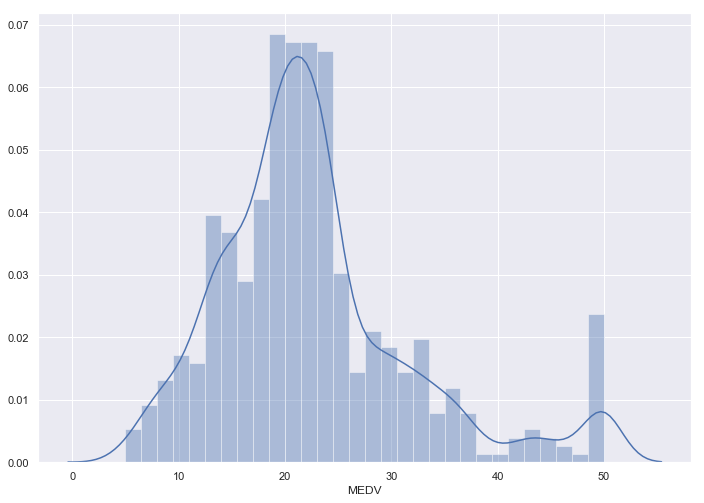

In [86]:
#Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.


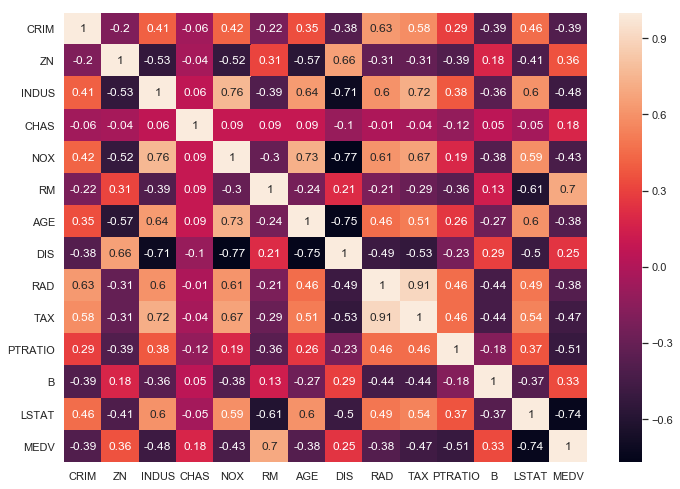

In [87]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


### Observations of Exploratory Analysis
#To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

#An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.


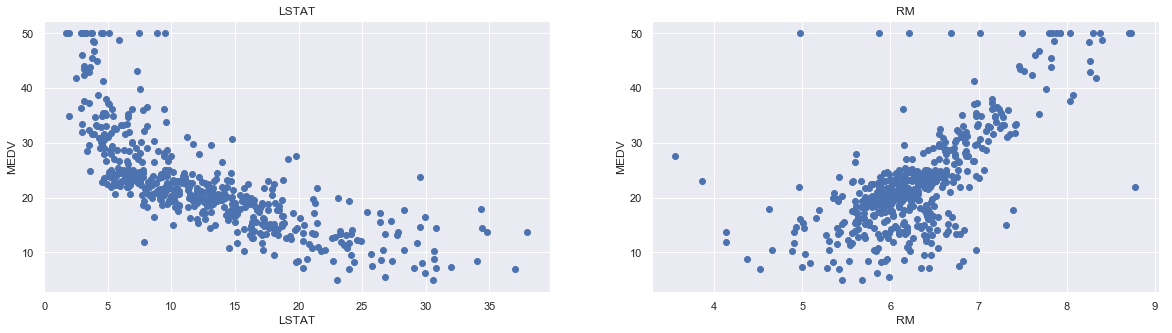

In [88]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Observations:
The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
#The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

### Preparing the data for training the model
We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [129]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [132]:
X.shape

(506, 2)

### Splitting the data into training and testing sets
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Training and testing the model
We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model evaluation
We will evaluate our model using RMSE and R2-score.


In [108]:
from sklearn.metrics import r2_score

In [109]:

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


# E4. Following the methods in the tutorial above, do the regression with just the rooms and not the other variable. How does this compare with the scipy result?
This may be helpful is figuring out how to write out the slope and intercept:
https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

In [143]:
# define the variables 
MEDV = boston['MEDV']
RM = pd.DataFrame(np.c_[boston['RM'], boston['RM']], columns = ['RM','RM'])

# Initially, I did RM = boston['RM']
# But when I ran the linear regression it needed a 2D array
# So I'm concating the RM with RM to make a repetitive 2D array



In [144]:
RM.shape
# this will preserve the 2D shape

(506, 2)

In [140]:
# split the data into training and testing sets
RM_train, RM_test, MEDV_train, MEDV_test = train_test_split(RM, MEDV, test_size = 0.2, random_state=5)
print(RM_train.shape)
print(RM_test.shape)
print(MEDV_train.shape)
print(MEDV_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [141]:
# train and test the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(RM_train, MEDV_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
# model evaluation for training set
MEDV_train_predict = lin_model.predict(RM_train)
rmse = (np.sqrt(mean_squared_error(MEDV_train, MEDV_train_predict)))
r2 = r2_score(MEDV_train, MEDV_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
MEDV_test_predict = lin_model.predict(RM_test)
rmse = (np.sqrt(mean_squared_error(MEDV_test, MEDV_test_predict)))
r2 = r2_score(MEDV_test, MEDV_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.972277149440586
R2 score is 0.43408977906372137


The model performance for testing set
--------------------------------------
RMSE is 4.895963186952216
R2 score is 0.6938399401553497


### I am incredibly pleased with this result, the first time I tried to run the linear regression with just RM data, I just copied the code from the tutorial and had plugged in just RM instead. Because the tutorial had used two variables, The model was expecting a 2D array and wouldn't run, it did give me instructions on how to what I believe is a placeholder into the array (1,-1) or something

### I didn't understand so instead I went back to the place in the tutorial where it concantated the RM and LSTAT into the X value, and instead I just concanted RM with RM. 

### And I think it worked

### QUick, easy, hacking